<a href="https://colab.research.google.com/github/k-gerasimova/numerical_methods-5-8/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def PROGONKA(A, B):
    u = np.zeros_like(B)
    v = np.zeros_like(B)
    x = np.zeros_like(B)
    n = len(B)
    v[0] = A[0, 1] / (-A[0, 0])
    u[0] = (-B[0]) / (-A[0, 0])

    for i in range(len(B) - 1):
        v[i] = -A[i, i + 1] / (A[i, i] + A[i, i - 1] * v[i - 1])
        u[i] = (-A[i, i - 1] * u[i - 1] + B[i]) / (A[i, i] + A[i, i - 1] * v[i - 1])

    v[n - 1] = 0;
    u[n - 1] = (A[n - 1, n - 2] * u[n - 2] - B[n - 1]) / (-A[n - 1, n - 1] - A[n - 1, n - 2] * v[n - 2])
    x[n - 1] = u[n - 1];
    for i in range(n - 2, -1, -1):
        x[i] = v[i] * x[i + 1] + u[i]

    return x


def tridiagonal_solve(a, b, c, d):
    #if not is_diagonally_dominant(a, b, c):
    #      print("Warning: The matrix is not diagonally dominant.")
    n = len(d)
    alpha = np.zeros(n-1)
    beta = np.zeros(n)
    x = np.zeros(n)

    # Прямой ход
    alpha[0] = -c[0] / b[0]
    beta[0] = d[0] / b[0]
    for i in range(1, n-1):
        alpha[i] = -c[i] / (a[i-1] * alpha[i-1] + b[i])
        beta[i] = (d[i] - a[i-1] * beta[i-1]) / (a[i-1] * alpha[i-1] + b[i])

    # Обратный ход
    x[-1] = (d[-1] - a[-1] * beta[-2]) / (a[-1] * alpha[-2] + b[-1])
    for i in range(n-2, -1, -1):
        x[i] = alpha[i] * x[i+1] + beta[i]

    return x

In [ ]:
def stability(sigma):
  if sigma<1/2: return True
  else:
    print(f"явная схема неустойчива при sigma={sigma}")
    return False

In [ ]:
a = 1
b = 0
f = lambda x,t: math.cos(x)*(math.cos(t) + math.sin(t))

alpha = 0
beta = 1
gamma = 1
delta = 0

l = np.pi/2
phi0 = lambda t:math.sin(t)
phi1 = lambda t:-math.sin(t)
psi = lambda x:0

U_true = lambda x,t:math.sin(t)*math.cos(x)

h = 0.1 #float(input())  #шаг по х
tau = 0.0045 #float(input()) #шаг по t

x = np.arange(0, l + h, h)
x = np.linspace(0, l, round(l/h))
#t = np.arange(0, 1+tau, tau)
t = np.linspace(0, 1, round(1/tau))


Явная схема

In [ ]:
def first_method(x,t, tau, h):
  U_1 = np.zeros((len(t),len(x)))
  for i in range(len(t)):
      U_1[i,0] = phi0(t[i])

  for k in range(len(t) - 1):
      for j in range(1, len(x) - 1):
          U_1[k+1, j] = (tau/h**2) * (U_1[k, j+1]) - 2*(tau/h**2)*(U_1[k, j]) + (tau/h**2 )* U_1[k, j - 1] + tau*f(x[j], t[k+1]) + U_1[k , j]
      U_1[k + 1, -1] = h * (-math.sin(t[k+1])) +(U_1[k+1,-2])
  return U_1

U_true_m = np.zeros((len(t),len(x)))
for k in range(len(t)):
   for i in range(len(x)):
      U_true_m[k, i] = U_true(x[i], t[k])


df = pd.DataFrame(data=first_method(x,t,tau,h), index=t, columns=x)
#pd.options.display.float_format = '{:20,.2f}'.format
df

,0.000000,0.104720,0.209440,0.314159,0.418879,0.523599,0.628319,0.733038,0.837758,0.942478,1.047198,1.151917,1.256637,1.361357,1.466077,1.570796
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.004525,0.004525,0.004496,0.004422,0.004299,0.004130,0.003915,0.003657,0.003359,0.003025,0.002657,0.002260,0.001839,0.001397,0.000940,0.000473,0.000020
0.009050,0.009050,0.008991,0.008841,0.008596,0.008257,0.007828,0.007312,0.006717,0.006048,0.005313,0.004519,0.003676,0.002793,0.001879,0.000954,0.000049
0.013575,0.013574,0.013486,0.013259,0.012891,0.012383,0.011739,0.010966,0.010073,0.009070,0.007967,0.006777,0.005513,0.004189,0.002822,0.001440,0.000082
0.018100,0.018099,0.017979,0.017676,0.017185,0.016506,0.015648,0.014618,0.013428,0.012090,0.010620,0.009034,0.007349,0.005585,0.003767,0.001930,0.000120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.981900,0.831554,0.823724,0.807621,0.783361,0.751154,0.711300,0.664190,0.610300,0.550183,0.484463,0.413832,0.339036,0.260872,0.180174,0.097806,0.014650
0.986425,0.834059,0.826203,0.810050,0.785715,0.753410,0.713435,0.666184,0.612132,0.551834,0.485918,0.415076,0.340057,0.261659,0.180719,0.098103,0.014697
0.990950,0.836547,0.828665,0.812462,0.788053,0.755650,0.715556,0.668164,0.613951,0.553475,0.487363,0.416311,0.341070,0.262440,0.181260,0.098399,0.014744
0.995475,0.839018,0.831111,0.814858,0.790375,0.757875,0.717662,0.670130,0.615758,0.555104,0.488798,0.417538,0.342077,0.263216,0.181798,0.098692,0.014791


In [ ]:
df = pd.DataFrame(data=U_true_m, index=t, columns=x)
#pd.options.display.float_format = '{:20,.2f}'.format
df

,0.000000,0.104720,0.209440,0.314159,0.418879,0.523599,0.628319,0.733038,0.837758,0.942478,1.047198,1.151917,1.256637,1.361357,1.466077,1.570796
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
0.004525,0.004525,0.004500,0.004426,0.004303,0.004134,0.003919,0.003661,0.003363,0.003028,0.002660,0.002262,0.001840,0.001398,0.000941,0.000473,2.770685e-19
0.009050,0.009050,0.009000,0.008852,0.008607,0.008267,0.007837,0.007321,0.006725,0.006055,0.005319,0.004525,0.003681,0.002796,0.001882,0.000946,5.541313e-19
0.013575,0.013574,0.013500,0.013278,0.012910,0.012401,0.011756,0.010982,0.010088,0.009083,0.007979,0.006787,0.005521,0.004195,0.002822,0.001419,8.311827e-19
0.018100,0.018099,0.017999,0.017703,0.017213,0.016534,0.015674,0.014642,0.013450,0.012110,0.010638,0.009049,0.007361,0.005593,0.003763,0.001892,1.108217e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.981900,0.831554,0.826999,0.813383,0.790855,0.759663,0.720147,0.672742,0.617965,0.556419,0.488775,0.415777,0.338224,0.256964,0.172890,0.086921,5.091803e-17
0.986425,0.834059,0.829490,0.815833,0.793237,0.761951,0.722317,0.674768,0.619827,0.558095,0.490248,0.417030,0.339242,0.257738,0.173411,0.087183,5.107140e-17
0.990950,0.836547,0.831964,0.818266,0.795603,0.764224,0.724471,0.676781,0.621676,0.559759,0.491710,0.418273,0.340254,0.258507,0.173928,0.087443,5.122373e-17
0.995475,0.839018,0.834421,0.820683,0.797953,0.766481,0.726611,0.678779,0.623512,0.561412,0.493162,0.419509,0.341259,0.259271,0.174442,0.087701,5.137501e-17


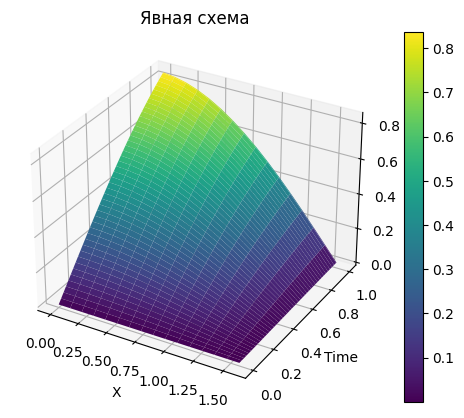

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(first_method(x,t,tau,h)), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('Явная схема')
fig.colorbar(surf)

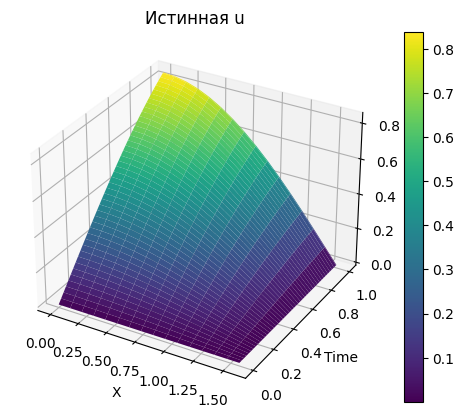

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(U_true_m), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('Истинная u')
fig.colorbar(surf)

Неявная схема

In [ ]:
def second_method(x,t,tau, h):
  U_2 = np.zeros((len(t),len(x)))
  for i in range(len(t)):
     U_2[i,0] = phi0(t[i])
  for k in range(len(t) -1):
#расчет для k=1
    A = np.zeros((len(x)-1, len(x)-1))
    B = np.zeros((len(x)-1))
    A[0,0] = -(2*tau/h**2 + 1)
    A[0,1] = tau/h**2
#A[len(x)-2, len(x)-2] = 1/h**2 - 1/tau
#A[len(x)-2, len(x)- 3] = 1/h**2
#B[0] = -f(x[1], t[1])*tau - U[0, 1] - tau/h**2 * U[1,0]
    B[0] = -f(x[1], t[k])*tau - (U_2[k,1]  + tau/h**2 * phi0(t[k+1]))
    A[-1, -1] = 1
    A[-1, -2] = -1
#B[len(x) -1] = -f(x[-2], t[0]) - U[0,len(x)-2] - 1/h**2 * U[1, len(x)-1]
    B[-1] = phi1(t[k+1])*h
    for i in range(1, len(x)-2):
        A[i, i+1] = tau/h**2
        A[i,i] = -(2*tau/h**2 + 1)
        A[i, i-1] = tau/h**2
        B[i] = -f(x[i+1], t[k])*tau - U_2[k, i+1]
    U_vrem = np.linalg.solve(A, B) #PROGONKA(A,B)
    for i in range(1, len(x)):
        U_2[k+1, i] = U_vrem[i-1]
  return U_2





In [ ]:
df = pd.DataFrame(data=second_method(x,t,tau, h), index=t, columns=x)
df

,0.000000,0.104720,0.209440,0.314159,0.418879,0.523599,0.628319,0.733038,0.837758,0.942478,1.047198,1.151917,1.256637,1.361357,1.466077,1.570796
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.004525,0.004525,0.004465,0.004383,0.004260,0.004091,0.003878,0.003623,0.003328,0.002996,0.002632,0.002239,0.001821,0.001384,0.000932,0.000473,0.000021
0.009050,0.009050,0.008936,0.008768,0.008519,0.008181,0.007755,0.007244,0.006654,0.005991,0.005263,0.004477,0.003642,0.002768,0.001866,0.000951,0.000046
0.013575,0.013574,0.013410,0.013155,0.012778,0.012270,0.011630,0.010864,0.009979,0.008985,0.007893,0.006715,0.005463,0.004153,0.002802,0.001431,0.000074
0.018100,0.018099,0.017887,0.017543,0.017037,0.016358,0.015504,0.014483,0.013303,0.011978,0.010522,0.008951,0.007283,0.005538,0.003739,0.001914,0.000104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.981900,0.831554,0.823463,0.807117,0.782633,0.750224,0.710191,0.662927,0.608905,0.548679,0.482871,0.412171,0.337325,0.259125,0.178406,0.096027,0.012872
0.986425,0.834059,0.825944,0.809549,0.784992,0.752485,0.712332,0.664927,0.610743,0.550336,0.484332,0.413420,0.338350,0.259916,0.178954,0.096329,0.012923
0.990950,0.836547,0.828409,0.811965,0.787334,0.754731,0.714459,0.666913,0.612568,0.551982,0.485782,0.414661,0.339368,0.260702,0.179500,0.096628,0.012973
0.995475,0.839018,0.830856,0.814364,0.789661,0.756961,0.716571,0.668885,0.614381,0.553617,0.487223,0.415893,0.340380,0.261483,0.180041,0.096926,0.013024


In [ ]:
df = pd.DataFrame(data=U_true_m, index=t, columns=x)
#pd.options.display.float_format = '{:20,.2f}'.format
df

,0.000000,0.104720,0.209440,0.314159,0.418879,0.523599,0.628319,0.733038,0.837758,0.942478,1.047198,1.151917,1.256637,1.361357,1.466077,1.570796
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
0.004525,0.004525,0.004500,0.004426,0.004303,0.004134,0.003919,0.003661,0.003363,0.003028,0.002660,0.002262,0.001840,0.001398,0.000941,0.000473,2.770685e-19
0.009050,0.009050,0.009000,0.008852,0.008607,0.008267,0.007837,0.007321,0.006725,0.006055,0.005319,0.004525,0.003681,0.002796,0.001882,0.000946,5.541313e-19
0.013575,0.013574,0.013500,0.013278,0.012910,0.012401,0.011756,0.010982,0.010088,0.009083,0.007979,0.006787,0.005521,0.004195,0.002822,0.001419,8.311827e-19
0.018100,0.018099,0.017999,0.017703,0.017213,0.016534,0.015674,0.014642,0.013450,0.012110,0.010638,0.009049,0.007361,0.005593,0.003763,0.001892,1.108217e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.981900,0.831554,0.826999,0.813383,0.790855,0.759663,0.720147,0.672742,0.617965,0.556419,0.488775,0.415777,0.338224,0.256964,0.172890,0.086921,5.091803e-17
0.986425,0.834059,0.829490,0.815833,0.793237,0.761951,0.722317,0.674768,0.619827,0.558095,0.490248,0.417030,0.339242,0.257738,0.173411,0.087183,5.107140e-17
0.990950,0.836547,0.831964,0.818266,0.795603,0.764224,0.724471,0.676781,0.621676,0.559759,0.491710,0.418273,0.340254,0.258507,0.173928,0.087443,5.122373e-17
0.995475,0.839018,0.834421,0.820683,0.797953,0.766481,0.726611,0.678779,0.623512,0.561412,0.493162,0.419509,0.341259,0.259271,0.174442,0.087701,5.137501e-17


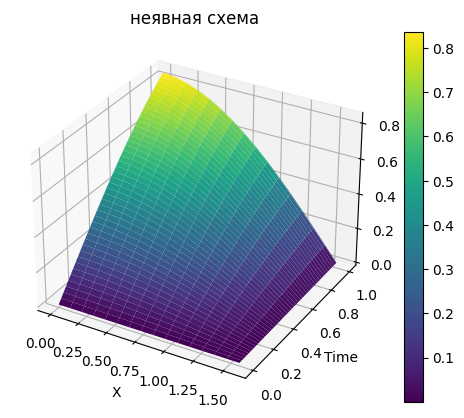

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(second_method(x,t,tau, h)), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('неявная схема')
fig.colorbar(surf)

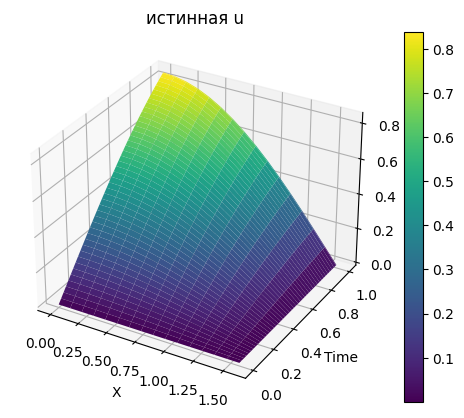

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(U_true_m), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('истинная u')
fig.colorbar(surf)

Схема Кранка-Николсона

In [ ]:
def K_N(x,t, Yav, Neyav):
  U_3 = np.zeros((len(t),len(x)))
  for k in range(len(t)):
    for j in range(len(x)):
      U_3[k,j] = 0.5* Yav[k,j] + 0.5 * Neyav[k,j]
  return U_3


In [ ]:
df = pd.DataFrame(data=K_N(x,t, first_method(x,t,tau,h), second_method(x,t,tau,h)), index=t, columns=x)
df

,0.000000,0.104720,0.209440,0.314159,0.418879,0.523599,0.628319,0.733038,0.837758,0.942478,1.047198,1.151917,1.256637,1.361357,1.466077,1.570796
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.004525,0.004525,0.004480,0.004402,0.004279,0.004110,0.003896,0.003640,0.003343,0.003010,0.002645,0.002250,0.001830,0.001390,0.000936,0.000473,0.000020
0.009050,0.009050,0.008964,0.008805,0.008557,0.008219,0.007791,0.007278,0.006686,0.006020,0.005288,0.004498,0.003659,0.002781,0.001873,0.000952,0.000047
0.013575,0.013574,0.013448,0.013207,0.012835,0.012326,0.011684,0.010915,0.010026,0.009028,0.007930,0.006746,0.005488,0.004171,0.002812,0.001435,0.000078
0.018100,0.018099,0.017933,0.017610,0.017111,0.016432,0.015576,0.014550,0.013365,0.012034,0.010571,0.008993,0.007316,0.005562,0.003753,0.001922,0.000112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.981900,0.831554,0.823594,0.807369,0.782997,0.750689,0.710745,0.663559,0.609603,0.549431,0.483667,0.413001,0.338180,0.259999,0.179290,0.096916,0.013761
0.986425,0.834059,0.826074,0.809800,0.785354,0.752947,0.712884,0.665555,0.611438,0.551085,0.485125,0.414248,0.339203,0.260788,0.179837,0.097216,0.013810
0.990950,0.836547,0.828537,0.812213,0.787694,0.755191,0.715008,0.667538,0.613260,0.552728,0.486573,0.415486,0.340219,0.261571,0.180380,0.097513,0.013859
0.995475,0.839018,0.830983,0.814611,0.790018,0.757418,0.717117,0.669507,0.615069,0.554360,0.488011,0.416716,0.341228,0.262349,0.180919,0.097809,0.013907


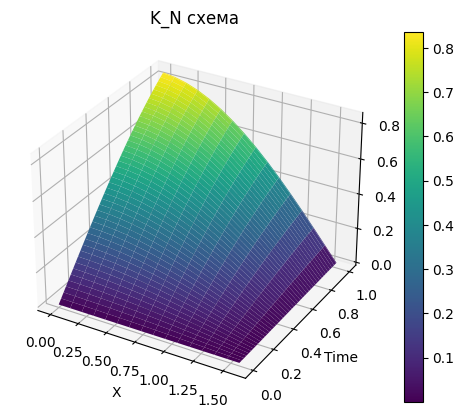

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(second_method(x,t,tau,h)), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('K_N схема')
fig.colorbar(surf)

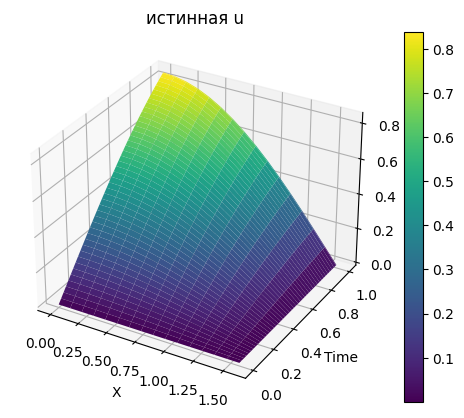

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(U_true_m), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('истинная u')
fig.colorbar(surf)

In [ ]:
def epsilon(U_have, U_find):
  eps = []
  for i in range(len(U_have[0])):
      eps.append(abs(U_find[-1, i] - U_have[-1, i]))
  error = max(eps)
  return error

In [ ]:
epsilon(U_true_m, first_method(x,t,tau,h))

0.01483679152402809

In [ ]:
epsilon(U_true_m, second_method(x,t,tau,h))

0.013074079477830536

In [ ]:
epsilon(U_true_m, K_N(x,t,first_method(x,t,tau,h), second_method(x,t,tau,h)))

0.013955435500929314

In [ ]:
H = [0.1, 0.05, 0.025]
sigma =0.45
error_first = []
error_second = []
error_k_n = []
for i in range(len(H)):
  tau = sigma * H[i] ** 2
  x = np.arange(0, l + H[i], H[i])
  t = np.arange(0, 1+tau, tau)
  U_have = np.zeros((len(t),len(x)))
  for k in range(len(t)):
    for j in range(len(x)):
      U_have[k, j] = U_true(x[j], t[k])
  U_1=first_method(x,t,tau,H[i])
  U_2=second_method(x,t,tau,H[i])
  U_3 = K_N(x,t,U_1, U_2)
  error_first.append(epsilon(U_have, U_1))
  error_second.append(epsilon(U_have, U_2))
  error_k_n.append(epsilon(U_have, U_3))



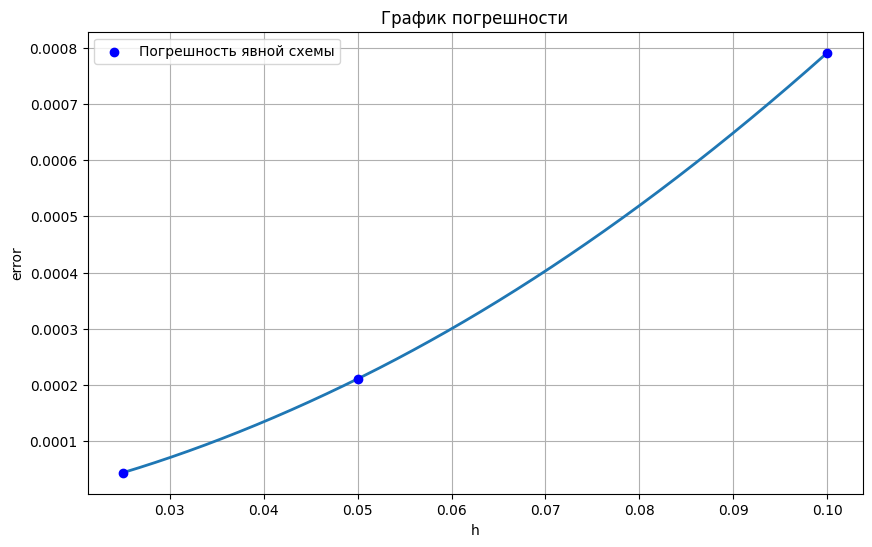

In [ ]:
from scipy.interpolate import PchipInterpolator

Y_reverse = error_first[::-1]
X_reverse = H[::-1]

pchip_reverse = PchipInterpolator(X_reverse, Y_reverse)

xnew_reverse = np.linspace(min(X_reverse), max(X_reverse), 1000)
ynew_reverse = pchip_reverse(xnew_reverse)

plt.figure(figsize=(10, 6))

plt.scatter(X_reverse, Y_reverse, c='blue', label='Погрешность явной схемы', zorder=6)

plt.plot(xnew_reverse, ynew_reverse, label='', linewidth=2)

plt.title('График погрешности')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.grid(True)

plt.show()

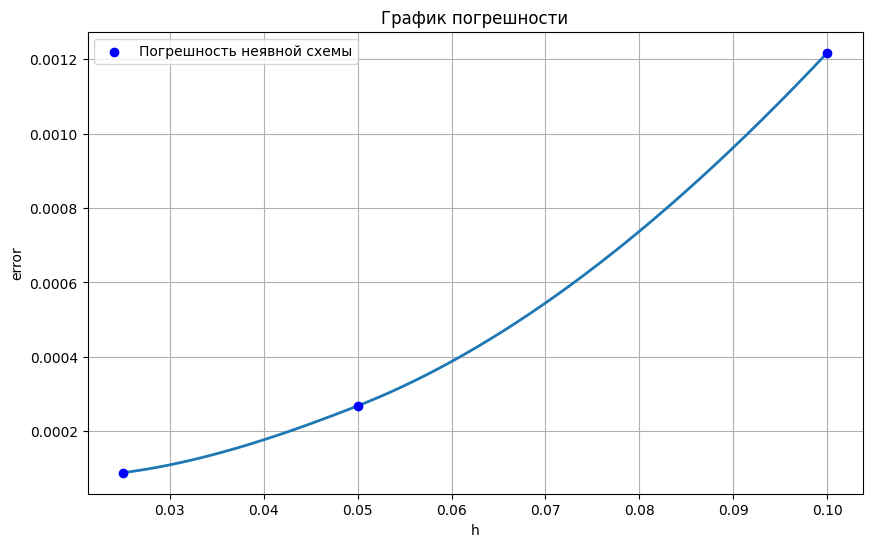

In [ ]:
Y_reverse = error_second[::-1]
X_reverse = H[::-1]

pchip_reverse = PchipInterpolator(X_reverse, Y_reverse)

xnew_reverse = np.linspace(min(X_reverse), max(X_reverse), 1000)
ynew_reverse = pchip_reverse(xnew_reverse)

plt.figure(figsize=(10, 6))

plt.scatter(X_reverse, Y_reverse, c='blue', label='Погрешность неявной схемы', zorder=6)

plt.plot(xnew_reverse, ynew_reverse, label='', linewidth=2)

plt.title('График погрешности')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.grid(True)

plt.show()

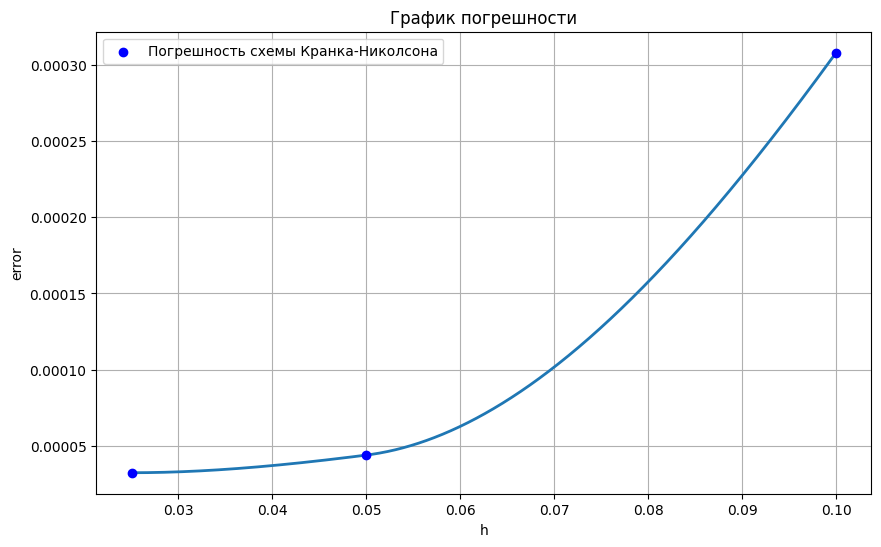

In [ ]:
Y_reverse = error_k_n[::-1]
X_reverse = H[::-1]

pchip_reverse = PchipInterpolator(X_reverse, Y_reverse)

xnew_reverse = np.linspace(min(X_reverse), max(X_reverse), 1000)
ynew_reverse = pchip_reverse(xnew_reverse)

plt.figure(figsize=(10, 6))

plt.scatter(X_reverse, Y_reverse, c='blue', label='Погрешность схемы Кранка-Николсона', zorder=6)

plt.plot(xnew_reverse, ynew_reverse, label='', linewidth=2)

plt.title('График погрешности')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.grid(True)

plt.show()